In [ ]:
# Clone the GitHub repo
!git clone https://github.com/shujaullah/Housing-Price.git

# Move into the repo
%cd Housing-Price


fatal: destination path 'Housing-Price' already exists and is not an empty directory.
/content/Housing-Price


In [ ]:
!git config --global user.email "ingale.p@northeastern.edu"
!git config --global user.name "Parth Ingale"


In [ ]:
%cd /content/Housing-Price
!git checkout -b data-preprocessing-parth


/content/Housing-Price
Switched to a new branch 'data-preprocessing-parth'


In [ ]:
import os
os.listdir('/content/Housing-Price')


['.git', 'house-prices-advanced-regression-techniques']

In [ ]:
# Load the data from the subfolder
import pandas as pd
train = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

# Quick checks
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Summary of missing values in train data
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Display the missing values
missing.to_frame(name='Missing Count')


,Missing Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


Text(0.5, 0, 'SalePrice')

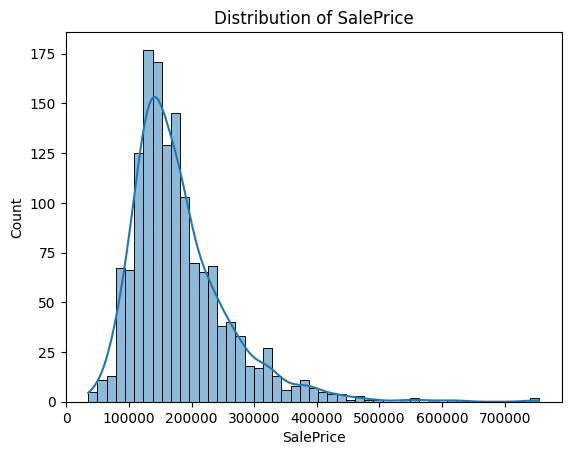

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")


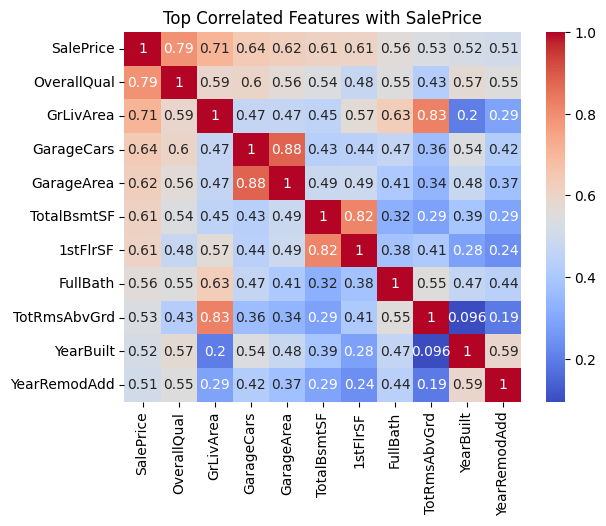

In [ ]:
# Get top 10 features most correlated with SalePrice
# Convert numeric features to numbers before calculating correlation
numeric_train = train.select_dtypes(include=['number'])  # Select only numeric columns

top_corr = numeric_train.corr()['SalePrice'].sort_values(ascending=False).head(11).index

# Plot heatmap
sns.heatmap(numeric_train[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")
plt.show()

In [ ]:
# Separate numerical and categorical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

# Check missing values in each type
num_missing = train[numerical_cols].isnull().sum()
cat_missing = train[categorical_cols].isnull().sum()

print("🔢 Numerical features with missing values:")
print(num_missing[num_missing > 0])

print("\n🔤 Categorical features with missing values:")
print(cat_missing[cat_missing > 0])


🔢 Numerical features with missing values:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

🔤 Categorical features with missing values:
Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# Impute numerical columns with median
for col in num_missing[num_missing > 0].index:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(test[col].median())


In [ ]:
# Impute categorical columns with mode or 'Missing'
for col in cat_missing[cat_missing > 0].index:
    if train[col].mode().empty:
        # fallback if no mode
        fill_val = 'Missing'
    else:
        fill_val = train[col].mode()[0]

    train[col] = train[col].fillna(fill_val)
    test[col] = test[col].fillna(fill_val)


In [ ]:
print("✅ Missing values left in train:", train.isnull().sum().sum())
print("✅ Missing values left in test:", test.isnull().sum().sum())


✅ Missing values left in train: 0
✅ Missing values left in test: 22


In [ ]:
# Find columns with missing values in test set
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
missing_test.to_frame(name="Missing Count")


,Missing Count
MSZoning,4
Utilities,2
BsmtFullBath,2
BsmtHalfBath,2
Functional,2
Exterior2nd,1
Exterior1st,1
BsmtUnfSF,1
BsmtFinSF2,1
BsmtFinSF1,1


In [ ]:
# Handle remaining missing values in test set
for col in missing_test.index:
    if test[col].dtype in ['int64', 'float64']:
        test[col] = test[col].fillna(test[col].median())
    else:
        fill_val = test[col].mode()[0] if not test[col].mode().empty else 'Missing'
        test[col] = test[col].fillna(fill_val)


In [ ]:
print("✅ Missing values left in test after full imputation:", test.isnull().sum().sum())


✅ Missing values left in test after full imputation: 0


In [ ]:
from scipy.stats import skew

# Select numeric features (excluding 'Id' and 'SalePrice')
numeric_feats = train.select_dtypes(include=['int64', 'float64']).drop(columns=['Id', 'SalePrice'])

# Compute skewness
skewed_feats = skew(numeric_feats, nan_policy='omit')
skewed = pd.Series(skewed_feats, index=numeric_feats.columns)
skewed = skewed[abs(skewed) > 0.75].sort_values(ascending=False)

print("Skewed features (abs(skew) > 0.75):")
skewed


Skewed features (abs(skew) > 0.75):


,0
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


In [ ]:
# Apply log1p transformation
import numpy as np
for col in skewed.index:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])


Text(0.5, 1.0, 'Log-Transformed SalePrice')

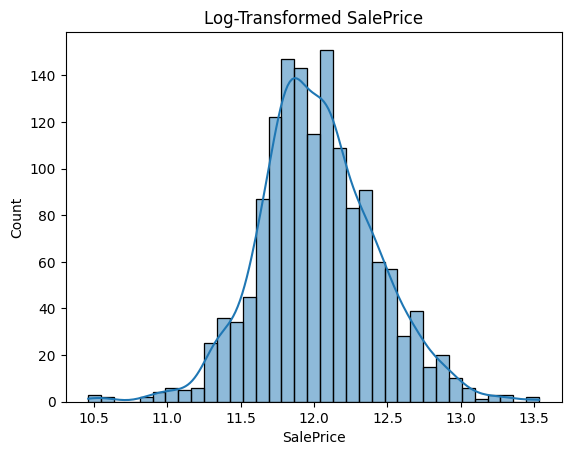

In [ ]:
# Apply log1p to target (helps if it's right-skewed)
train["SalePrice"] = np.log1p(train["SalePrice"])

# Confirm transformation
sns.histplot(train['SalePrice'], kde=True)
plt.title("Log-Transformed SalePrice")


In [ ]:
# Save target and drop it before encoding
y = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)

# Combine datasets for consistent encoding
all_data = pd.concat([train, test], axis=0, sort=False)
print("Combined shape before encoding:", all_data.shape)


Combined shape before encoding: (2919, 80)


In [ ]:
# One-hot encode all categorical variables
all_data_encoded = pd.get_dummies(all_data)
print("Shape after One-Hot Encoding:", all_data_encoded.shape)


Shape after One-Hot Encoding: (2919, 288)


In [ ]:
# Split the encoded data back into train and test
X = all_data_encoded.iloc[:train.shape[0], :].copy()
X_test = all_data_encoded.iloc[train.shape[0]:, :].copy()

# Restore target variable
y = y.reset_index(drop=True)


In [ ]:
from sklearn.model_selection import train_test_split

# 70% train, 15% validation (so test_size = 0.15)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42
)

# Check dimensions
print("Train set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set (Kaggle):", X_test.shape)


Train set: (1241, 288)
Validation set: (219, 288)
Test set (Kaggle): (1459, 288)


In [ ]:
# Save the split datasets (optional but useful)
X_train.to_csv("X_train.csv", index=False)
X_val.to_csv("X_val.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_val.to_csv("y_val.csv", index=False)
